In [62]:
import numpy as np
from tqdm import tqdm
from pprint import pprint
import pandas as pd
import pdb
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 15, 7

scale = 1

# Get Alberta Average demand and prices
df = pd.read_csv('AESO_2020_demand_price.csv')
HE = []
end_index = df.shape[0]//(48 * 2) + 1
for day in range(1, end_index):
    for hour in range(1, (2 * 48) + 1):
        HE.append(hour)
df['HE'] = HE
df = df.drop(df.columns[[0, 2]], axis = 1)
df = df.set_index('HE', drop = True)
df = df.groupby('HE', as_index=True).mean()
df_to_plot = df.drop(df.columns[[0]], axis = 1)

alberta_avg_power_price = np.array(df.iloc[:, 0])
alberta_avg_demand = np.array(df.iloc[:, 1])/scale

In [17]:
# print(alberta_avg_demand[0])
# print(alberta_avg_demand[8:17].shape)
# print(alberta_avg_demand[18:24].shape)
# print(alberta_avg_demand[0:7].shape)
# shifted_demand_curve = np.append(alberta_avg_demand[8:17], alberta_avg_demand[18:23], alberta_avg_demand[0:7])
# plt.plot(shifted_demand_curve);

In [5]:
a.mean(axis = 0)

array([1.5, 2.5, 3.5])

In [6]:
print(alberta_avg_demand[8:17])
print(alberta_avg_demand[8:17].max())
print(alberta_avg_demand[8:17].mean())

[ 9940.9010989  10019.         10063.54945055 10063.20879121
 10060.35164835 10049.46153846 10052.23076923 10085.14285714
 10139.13186813]
10139.131868131868
10052.553113553113


In [53]:
# no V2G
a = np.array([ 9940.9010989 , 10019.        , 10063.54945055, 10063.20879121,
 10060.35164835, 10049.46153846, 10052.23076923, 10085.14285714,
 10139.13186813, 14042.62637363, 14074.64835165, 14020.3956044,
 13966.9989011 , 13835.15032967, 13268.12901099, 12800.93934066,
 12623.45164835, 12516.56307692, 12090.24923077, 13839.0756044,
 12902.54417582, 12641.9978022 , 12694.15912088, 12840.46197802,])
a_avg = a.mean() * np.ones(shape = a.shape)
# With V2G
b = np.array([ 9940.9010989 , 10019.        , 10063.54945055, 10063.20879121,
 10060.35164835, 10049.46153846 ,10052.23076923, 10085.14285714,
 10139.13186813,  8982.50637363 , 9528.30835165,  9843.8956044,
 10366.6189011 , 10387.31032967 , 9338.00901099,  8942.25934066,
  9940.41164835, 10494.26307692,  9460.46923077,  8912.3756044,
 11375.50417582, 14677.7378022,  12739.03912088, 14316.58197802,])
b_avg = b.mean() * np.ones(shape = b.shape)

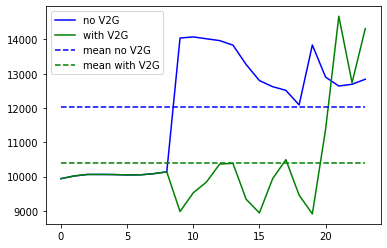

In [54]:
plt.plot(a, label = 'no V2G',color = 'blue');
plt.plot(b, label = 'with V2G', color = 'green');
plt.plot(a_avg, '--', label = 'mean no V2G', color = 'blue')
plt.plot(b_avg, '--', label = 'mean with V2G', color = 'green')
plt.legend();

In [55]:
# print('PAR with no V2G: ', np.max(a)/a.mean())
# print('PAR with V2G: ', np.max(b)/b.mean())

In [56]:
print('Std with no V2G: ', a.std())
print('Std with V2G: ', b.std())

Std with no V2G:  1615.6100407728948
Std with V2G:  1455.1248272659889


In [57]:
# print('Std with no V2G: ', a[:22].std())
# print('Std with V2G: ', b[:22].std())

In [59]:
load_no_V2G = np.array([357.69132368570695, 403.76232892114103, 564.9091119984761, 752.0175858458217, 957.485936599047, 1187.6999327102687, 1402.5429668137344,1615.6100407728948])

In [60]:
load_V2G = np.array([347.43618595914126, 458.33207902820953, 651.4809270340282, 675.8017560123814, 724.0963407102313, 1145.5980221066657,1407.9250083769923,1455.1248272659889])

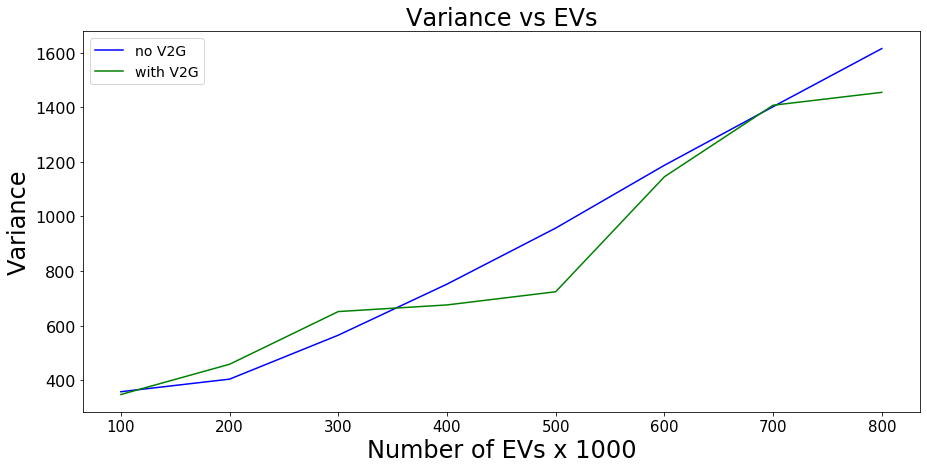

In [64]:
# no V2G
a = load_no_V2G
# With V2G
b = load_V2G
plt.plot(a, label = 'no V2G',color = 'blue');
plt.plot(b, label = 'with V2G', color = 'green');
plt.legend(fontsize=14);
plt.xticks(fontsize=16);
plt.yticks(fontsize=16)
plt.xticks([0,1,2,3,4,5,6,7],[100,200,300,400,500,600,700,800], fontsize = 15);
plt.ylabel('Variance', fontsize=24);
plt.title('Variance vs EVs', fontsize=24);
plt.xlabel('Number of EVs x 1000', fontsize=24);